# Glass Ceiling - A Perspective on Earning Salary Over the last 15 Years

## Objective: 
To show the differences in earning salary population for mexican woman during the last 15 years.<br /> After our data exploration, we just came down to three data sources which are:
* Busy population by economical activity
* Busy population with informal economical activity
* **Population by gender and earned salary.**

## Salary per Gender over the last 15 years

The further analysis will try to make a statment about how women economical growth has been slower than men in Mexico.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

We import our sources:

In [15]:
asalariados=pd.read_csv('Porcentaje_de_Asalariados_que_Ganan_hasta_tres_Salarios_Minimos.csv')

So first lets replace ND to NaN

In [16]:
asalariados=asalariados.replace('ND',np.NaN)

In [17]:
asalariados=asalariados.dropna(thresh=6)

In [18]:
asalariados.head()

,Periodo,Trimestre,Entidad_Federativa,Sexo,Asalariados que ganan hasta 3 salarios mínimos,Asalariados que reportan ingresos,Porcentaje de asalariados que ganan hasta tres salarios mínimos
0,2005,1.0,Nacional,Hombres,9723085,14802566,65.685132
1,2005,1.0,Nacional,Mujeres,6290725,8602165,73.129555
2,2005,2.0,Nacional,Hombres,9399550,14647255,64.172775
3,2005,2.0,Nacional,Mujeres,6319112,8755287,72.174813
4,2005,3.0,Nacional,Hombres,9428780,14792341,63.740959


In [19]:
asalariados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Periodo                                                          126 non-null    object 
 1   Trimestre                                                        126 non-null    float64
 2   Entidad_Federativa                                               126 non-null    object 
 3   Sexo                                                             126 non-null    object 
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    object 
 5   Asalariados que reportan ingresos                                126 non-null    object 
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    object 
dtypes: float64(1), object(6)
memory usage: 7.9+ K

Let's convert accordingly the `dtypes`of the `asalariados` dataframe.

In [8]:
asalariado=asalariados.convert_dtypes()

In [9]:
asalariado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Periodo                                                          126 non-null    string
 1   Trimestre                                                        126 non-null    Int64 
 2   Entidad_Federativa                                               126 non-null    string
 3   Sexo                                                             126 non-null    string
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    string
 5   Asalariados que reportan ingresos                                126 non-null    string
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    string
dtypes: Int64(1), string(6)
memory usage: 8.0 KB


In [20]:
asalariados['Asalariados que ganan hasta 3 salarios mínimos']=pd.to_numeric(asalariados['Asalariados que ganan hasta 3 salarios mínimos'])

In [25]:
asalariados['Asalariados que reportan ingresos']=pd.to_numeric(asalariados['Asalariados que reportan ingresos'])

In [22]:
asalariados['Porcentaje de asalariados que ganan hasta tres salarios mínimos']=pd.to_numeric(asalariados['Porcentaje de asalariados que ganan hasta tres salarios mínimos'])

In [24]:
asalariados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Periodo                                                          126 non-null    object 
 1   Trimestre                                                        126 non-null    float64
 2   Entidad_Federativa                                               126 non-null    object 
 3   Sexo                                                             126 non-null    object 
 4   Asalariados que ganan hasta 3 salarios mínimos                   126 non-null    int64  
 5   Asalariados que reportan ingresos                                126 non-null    int64  
 6   Porcentaje de asalariados que ganan hasta tres salarios mínimos  126 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usa

Now that we have the `asalariados` dataframe cleaned, let's start by analysing the change by gender on earning population over the last years.

In [26]:
asalariados['Periodo'].unique()

array(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype=object)

We have continuous data from the last 15 years until 2020. So we'll check the growth in percentage over the years by gender, the hypothesis is that the grown for men has grown quicker than female:

## Earning population who earns more than three times the minimum wage

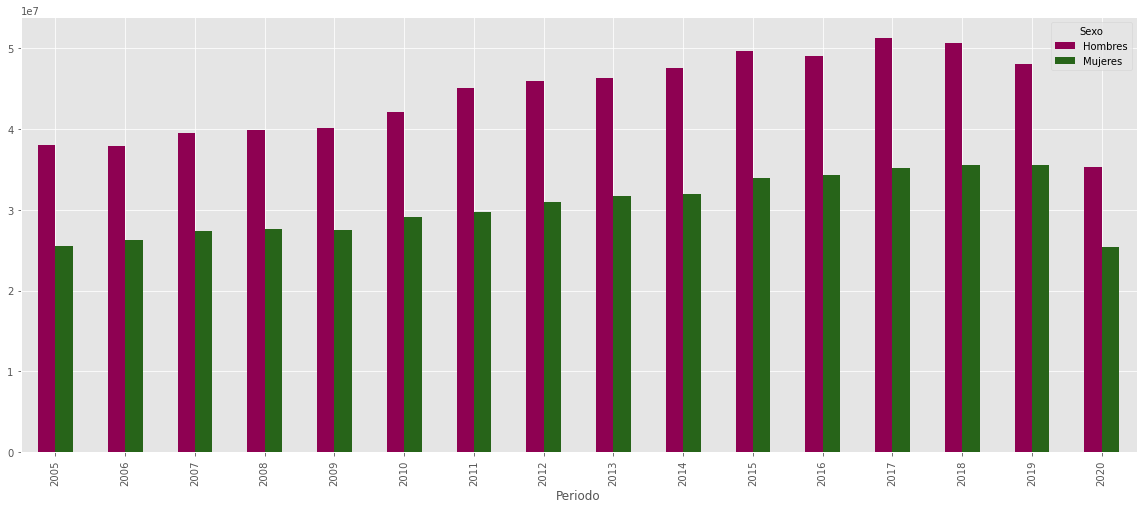

In [86]:
# recupera el salario de cada año, agrupado por sexo:
ax1 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Asalariados que ganan hasta 3 salarios mínimos'].unstack()
# genera el gráfico:
ax1.plot(kind="bar",figsize =(20, 8),colormap='PiYG')

As per the graph we can se a very constant growth all over the years between gender; let's get the mean value from the differences in earned wage. <br /> Let's define a new dataframe for this:

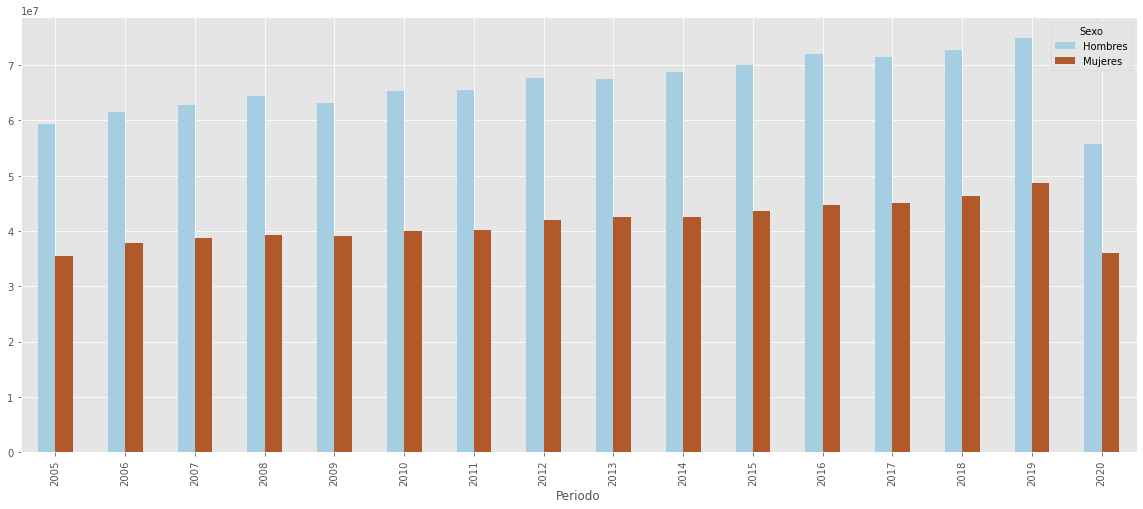

In [91]:
# recupera el salario de cada año, agrupado por sexo:
ax2 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Asalariados que reportan ingresos'].unstack()
# genera el gráfico:
ax2.plot(kind="bar",figsize =(20, 8),colormap='Paired')

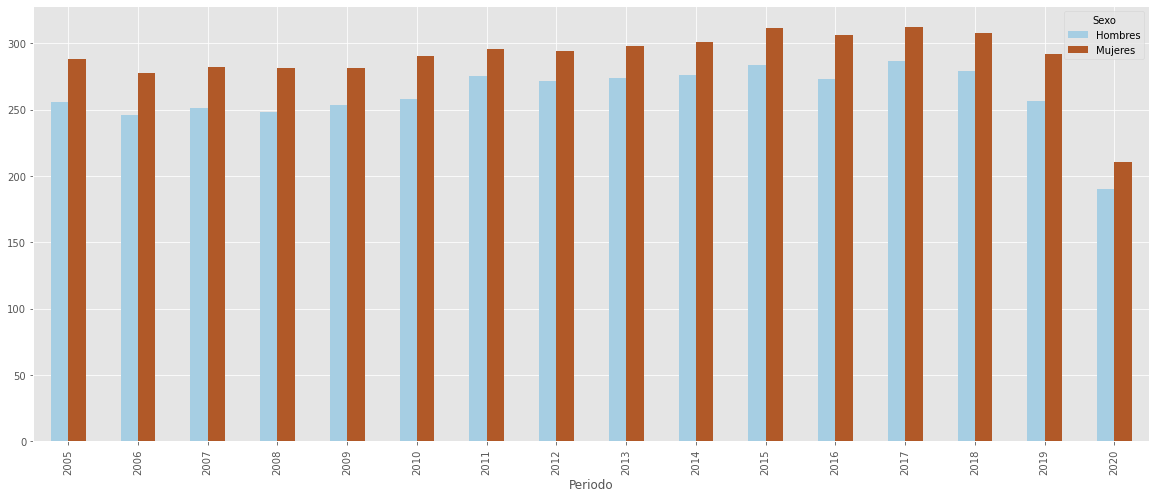

In [97]:
# recupera el salario de cada año, agrupado por sexo:
ax2 = asalariados.groupby(['Periodo', 'Sexo']).sum()['Porcentaje de asalariados que ganan hasta tres salarios mínimos'].unstack()
# genera el gráfico:
ax2.plot(kind="bar",figsize =(20, 8),colormap='Paired')

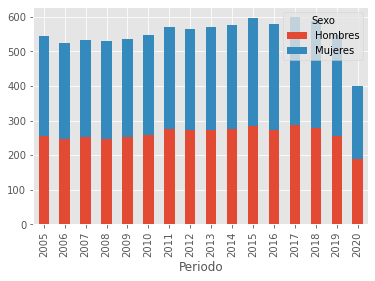

In [104]:
ax3 = asalariados.groupby(['Periodo','Sexo'])['Porcentaje de asalariados que ganan hasta tres salarios mínimos'].sum().unstack('Sexo').fillna(0)
ax3.plot(kind='bar', stacked=True)